# Подключение библиотек

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams['figure.dpi'] = 130

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import statsmodels.sandbox.stats.multicomp as multi

In [6]:
from scipy.stats import boxcox

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
from IPython.display import HTML
style = "<style>svg{width:200% !important;height:200% !important;}</style>"
HTML(style)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import plotly.express as px
import plotly.graph_objs as go

In [11]:
import plotly.io as pio
pio.renderers.default='notebook'

In [12]:
import json

# Загрузка и анализ данных

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/us events ad_revenue filtered 03.02-07.02.csv')

In [14]:
df.head(10)

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
5,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:53,1644156953,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
6,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:03,1644156963,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
7,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:23,1644156983,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN
8,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:33,1644156993,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN
9,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:53,1644157013,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN


Можно сразу удалить строки с Nan id профиля

In [15]:
df = df.dropna(axis='index', how='any', subset=['profile_id'])

In [16]:
df.isna().sum()

profile_id                      0
os_version                      0
device_manufacturer             0
device_model                    0
device_type                     0
device_locale                   0
event_name                      0
event_json                      0
event_datetime                  0
event_timestamp                 0
event_receive_datetime          0
event_receive_timestamp         0
connection_type                 0
operator_name               18879
country_iso_code                0
city                       323694
dtype: int64

Столбец event_json нужно преобразовать в датафрейм

In [17]:
df.event_json[0]

'{"ad_type":"banner","placement":"","view_index":1,"session_view_index":0,"cur_ticks":637795729492245130,"session_length":705.8807,"revenue":0.000510313,"ads_ltv":0.487876676518837,"ecpm_sma":0.511508107185364,"normalized_ecpm_sma":0.511508107185364,"value":0.000510313,"currency":"USD","ad_country_code":"US","network_name":"Google AdMob","ad_unit_id":"64c6b1114ea8c1cc","ad_network_placement":"ca-app-pub-7511632782617496/8825263691","creativeId":"CJ3XirfD5vUCFYPnKAUdG3MOYQ"}'

In [18]:
a = df.event_json.apply(json.loads).values.tolist()

In [19]:
js_df = pd.DataFrame.from_records(a)

In [20]:
js_df.head(10)

,ad_type,placement,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
0,banner,,1,0,637795729492245130,705.88070,0.000510,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,banner,,1,0,637795729659949790,722.65120,0.000510,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,banner,,1,0,637796515863735930,431.81290,0.002386,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
3,int,next_level,1,1,637797353426827330,125.94960,0.013894,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364
4,banner,,1,0,637797357392197840,12.71129,0.006828,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw
5,banner,,1,0,637797357542806540,27.75300,0.000494,0.061065,1.543673,1.543673,0.000494,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CKjDtPSh6_UCFV-DywEd7-gBAQ
6,banner,,1,0,637797357641550460,37.62716,0.002386,0.063451,1.627922,1.627922,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
7,banner,,1,0,637797357843375100,57.81027,0.000494,0.063945,1.514549,1.514549,0.000494,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CPTz84Ki6_UCFUp2wQodL68LZw
8,banner,,1,0,637797357941529010,67.62502,0.002386,0.066332,1.601711,1.601711,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-57
9,banner,,1,0,637797358143310010,87.80360,0.000494,0.066826,1.490959,1.490959,0.000494,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,COaY9ZCi6_UCFRN3wQodXY4GCg


In [21]:
js_df.network_name.value_counts()

Google AdMob         484728
APPLOVIN_EXCHANGE    338419
AppLovin              20830
Facebook              16088
Name: network_name, dtype: int64

In [22]:
js_df.isna().sum()

ad_type                 0
placement               0
view_index              0
session_view_index      0
cur_ticks               0
session_length          0
revenue                 0
ads_ltv                 0
ecpm_sma                0
normalized_ecpm_sma     0
value                   0
currency                0
ad_country_code         0
network_name            0
ad_unit_id              0
ad_network_placement    0
creativeId              0
dtype: int64

В созданном датафрейме нет Nan значений, что хорошо

## 1

Создадим новый датафрейм на основе изначального датасета, и добавим в него eCPM, и тип рекламы

In [23]:
ecpm_df = df.copy()

In [24]:
ecpm_df['ad_type'] = js_df.ad_type

In [137]:
ecpm_df['ecpm'] = js_df.normalized_ecpm_sma

In [26]:
ecpm_df.head(10)

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city,ad_type,ecpm
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk,banner,0.511508
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk,banner,0.511389
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte,banner,0.928597
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa,int,13.782633
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN,banner,1.660282
5,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:53,1644156953,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN,banner,1.543673
6,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:03,1644156963,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN,banner,1.627922
7,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:23,1644156983,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN,banner,1.514549
8,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:33,1644156993,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN,banner,1.601711
9,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:53,1644157013,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN,banner,1.490959


In [27]:
ecpm_df.dropna(subset=['ecpm', 'ad_type'], inplace=True)
ecpm_df.isna().sum()

profile_id                      0
os_version                      0
device_manufacturer             0
device_model                    0
device_type                     0
device_locale                   0
event_name                      0
event_json                      0
event_datetime                  0
event_timestamp                 0
event_receive_datetime          0
event_receive_timestamp         0
connection_type                 0
operator_name               18879
country_iso_code                0
city                       323694
ad_type                         0
ecpm                            0
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f576bc63790>],
      dtype=object)

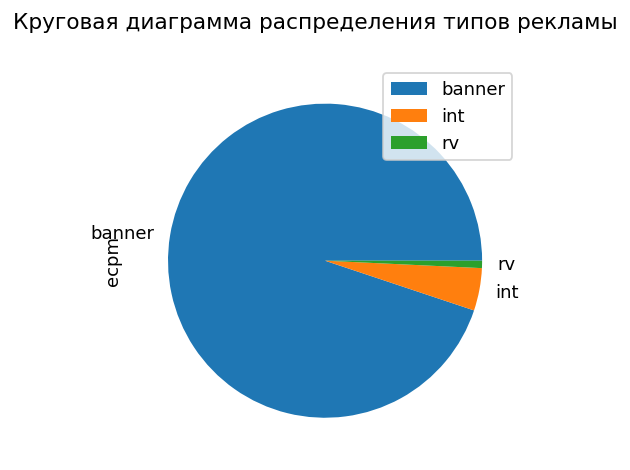

In [28]:
ecpm_df.groupby('ad_type').agg({'ecpm': 'count'}).plot(kind='pie', subplots=True, title='Круговая диаграмма распределения типов рекламы')

In [29]:
ad_type_list = ['banner', 'int', 'rv']

Удаление выбросов

In [30]:
for i in ad_type_list:
  low = ecpm_df[ecpm_df.ad_type == i].ecpm.quantile(.1)
  high = ecpm_df[ecpm_df.ad_type == i].ecpm.quantile(.9)
  ecpm_df.drop(ecpm_df[(ecpm_df.ad_type == i) & ((ecpm_df.ecpm < low) | (ecpm_df.ecpm > high))].index, inplace=True)

### 1.a Для каждого формата рекламы: построить распределение средних eCPM-ов юзеров

Сргуппируем данные по профилю, и типу рекламы

In [31]:
gr = ecpm_df.groupby(['profile_id', 'ad_type']).agg({'ecpm': 'mean'}).sort_values('ecpm')
gr.reset_index(inplace=True)

[Text(0.5, 1.0, 'Распределение eсpm по типу рекламы')]

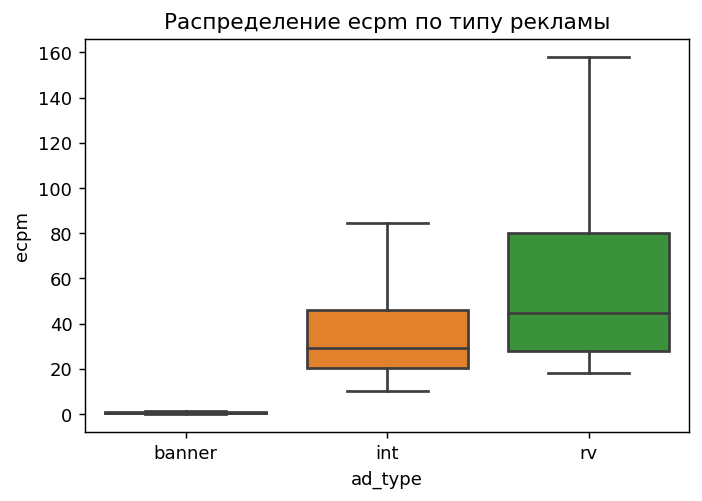

In [32]:
sns.boxplot(x='ad_type', y='ecpm', data=gr, showfliers = False).set(title='Распределение eсpm по типу рекламы')

[Text(0.5, 1.0, 'Распределение ecpm с баннерной рекламой')]

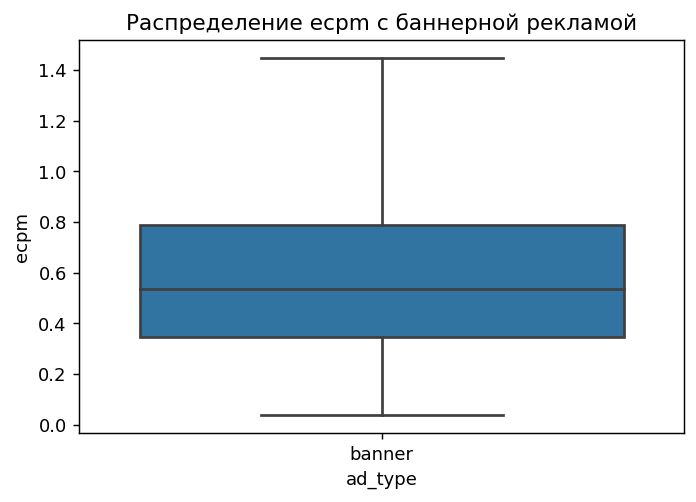

In [33]:
sns.boxplot(x=gr.ad_type[gr.ad_type == 'banner'], y='ecpm', data=gr, showfliers = False).set(title='Распределение ecpm с баннерной рекламой')

[Text(0.5, 1.0, 'Распределение ecpm с полноэкранной и видео рекламой')]

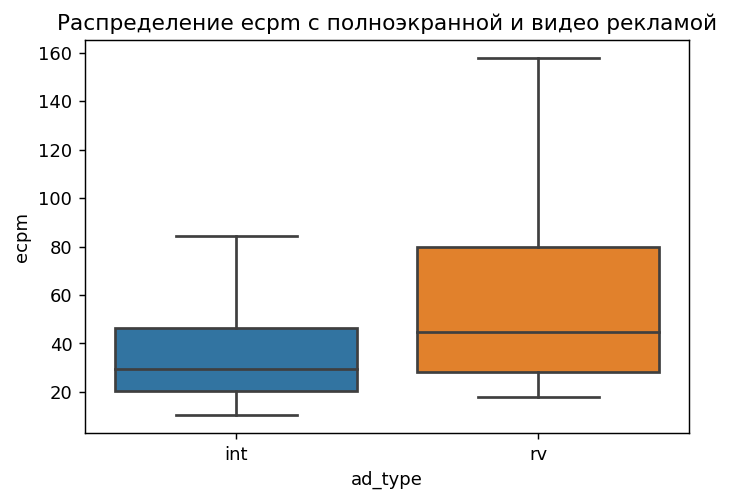

In [34]:
sns.boxplot(x=gr.ad_type[(gr.ad_type == 'int') | (gr.ad_type == 'rv')], y='ecpm', data=gr, showfliers = False).set(title='Распределение ecpm с полноэкранной и видео рекламой')

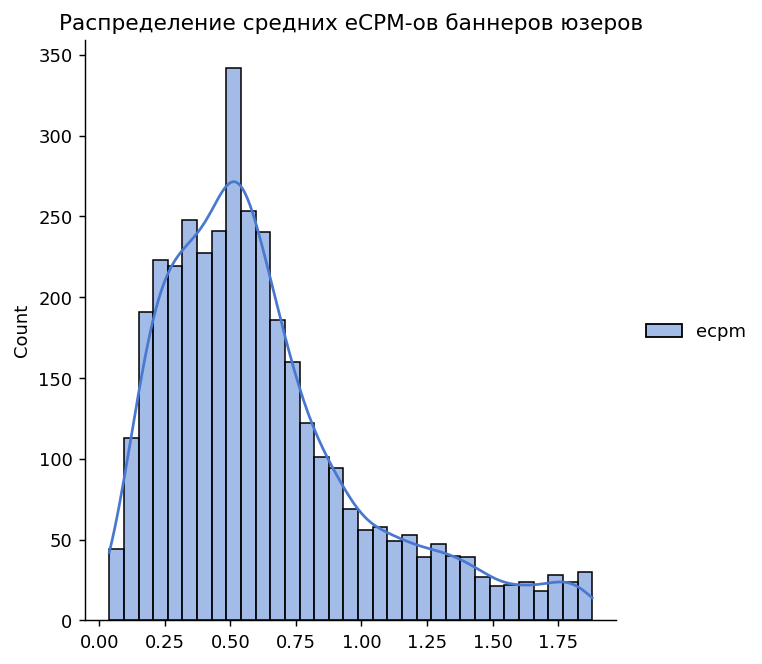

In [35]:
sns.displot(data=gr[gr.ad_type == 'banner'], kde=True, palette='muted').set(title='Pаспределение средних eCPM-ов баннеров юзеров')

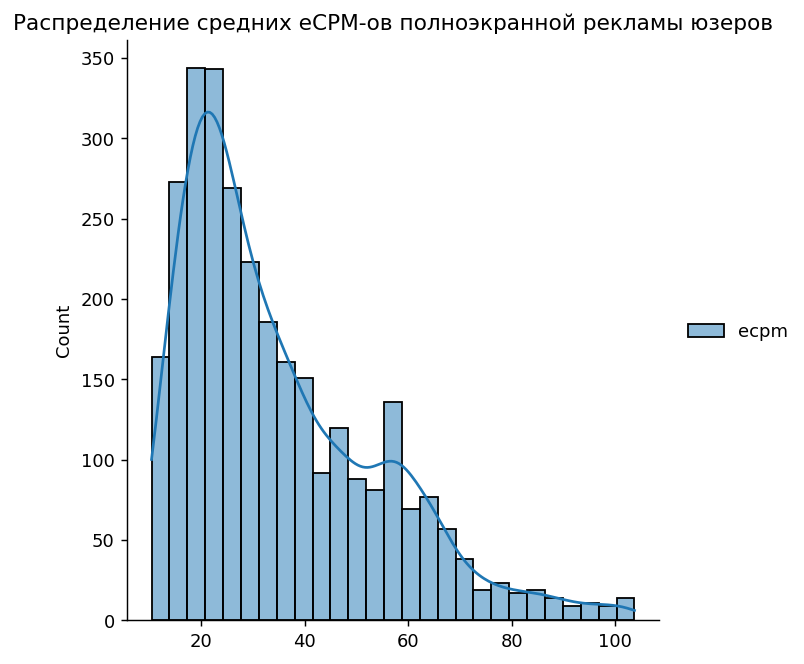

In [36]:
sns.displot(data=gr[gr.ad_type == 'int'], kde=True).set(title='Pаспределение средних eCPM-ов полноэкранной рекламы юзеров')

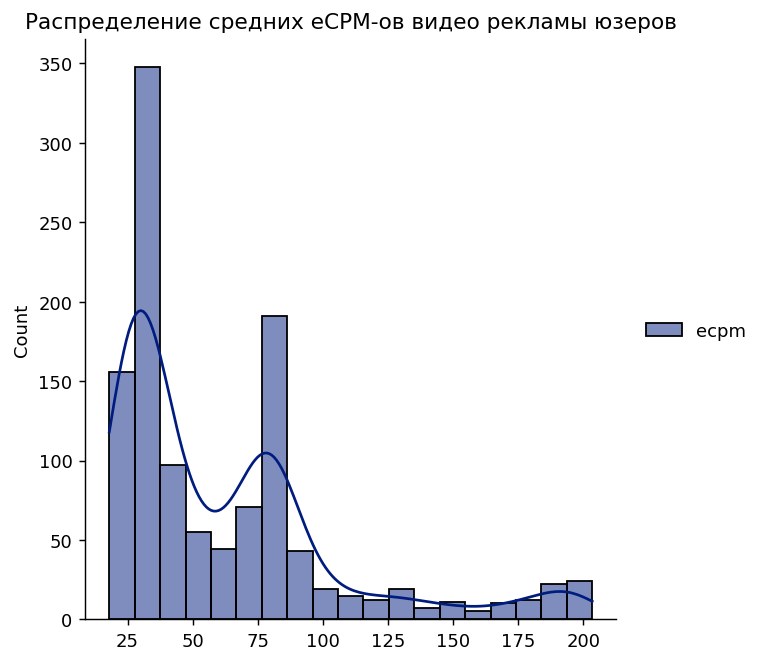

In [37]:
sns.displot(data=gr[gr.ad_type == 'rv'], kde=True, palette='dark').set(title='Pаспределение средних eCPM-ов видео рекламы юзеров')

Распределения похожи на логнормальное распределение. Это означает что значения логарифма от ecpm будет распределены нормально.

### 1.b Для каждого формата рекламы: отобразить средние eCPM-ы по городам, версиям ОС

In [38]:
avg_ecpm = ecpm_df.groupby(['ad_type']).agg({'ecpm': 'mean'}).reset_index()

[Text(0.5, 1.0, 'Средние ecpm по типу рекламы')]

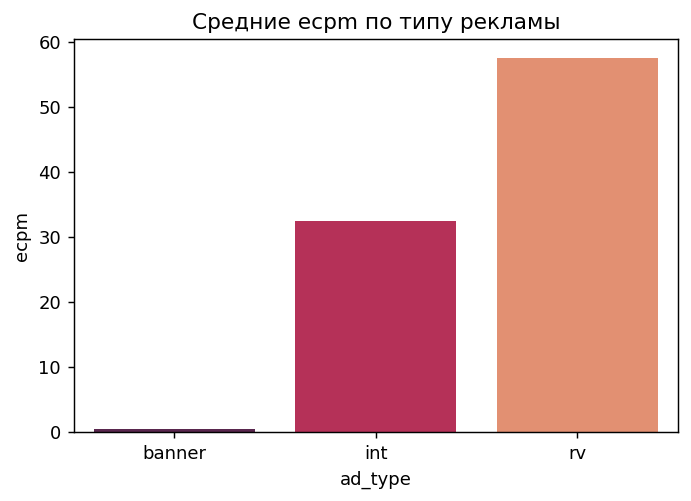

In [39]:
sns.barplot(data=avg_ecpm, x='ad_type', y='ecpm', palette='rocket').set(title='Средние ecpm по типу рекламы')

Из этого графика видно, что за показ баннера рекламная сеть заплатит сильно меньше, чем при другой. Но баннер висит постояно, и в сумме он может принести больше чем показ видео.

In [40]:
avg_city_ecpm = ecpm_df[ecpm_df.ad_type.isin(['int', 'rv'])].groupby(['ad_type', 'city']).agg({'ecpm': 'mean'}).reset_index()

In [41]:
top_avg_city_ecpm_list = avg_city_ecpm[avg_city_ecpm.ad_type.isin(['int', 'rv'])].groupby('city').agg({'ecpm': 'sum'}).sort_values(by='ecpm', ascending=False).reset_index().head(10)
top_avg_city_ecpm_list = top_avg_city_ecpm_list.city.tolist()

In [42]:
tmp = avg_city_ecpm[avg_city_ecpm.city.isin(top_avg_city_ecpm_list)]

In [43]:
top_avg_city_ecpm_list = [str[:3] for str in top_avg_city_ecpm_list]

In [44]:
tmp['city'] = tmp['city'].apply(lambda x: x[:3])

[Text(0.5, 1.0, 'Топ 10 городов по средним ecpm')]

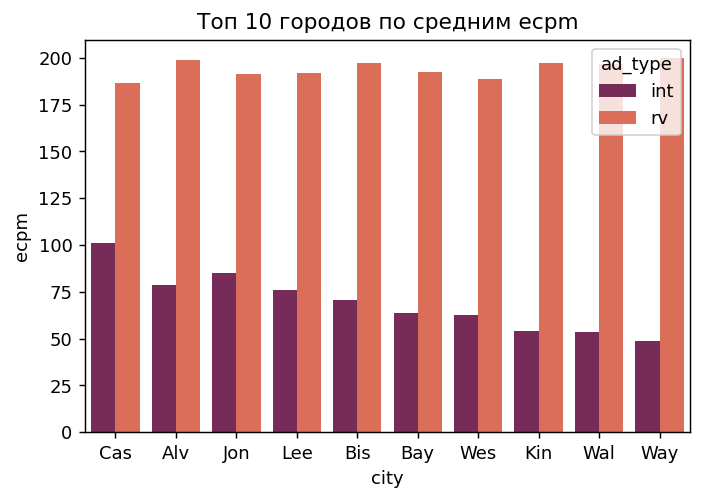

In [45]:
sns.barplot(data=tmp, x='city', y='ecpm', hue='ad_type',order=top_avg_city_ecpm_list, palette='rocket', ci=None).set(title='Топ 10 городов по средним ecpm')

In [46]:
banner_avg_city_ecpm = ecpm_df[ecpm_df.ad_type == 'banner'].groupby(['ad_type', 'city']).agg({'ecpm': 'mean'}).reset_index().sort_values(by='ecpm', ascending=False)

In [47]:
banner_avg_city_ecpm = banner_avg_city_ecpm.sort_values(by='ecpm', ascending=False).head(10)

In [48]:
tmp = banner_avg_city_ecpm

In [49]:
top_avg_city_ecpm_list = [str[:3] for str in banner_avg_city_ecpm.city.tolist()]

In [50]:
tmp['city'] = tmp['city'].apply(lambda x: x[:3])

[Text(0.5, 1.0, 'Топ 10 городов по средним ecpm banner')]

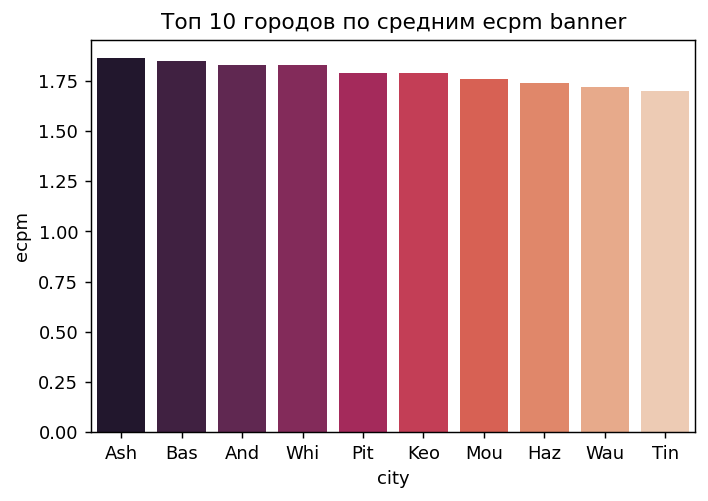

In [51]:
sns.barplot(data=tmp, x='city', y='ecpm', order=banner_avg_city_ecpm.city, palette='rocket', ci=None).set(title='Топ 10 городов по средним ecpm banner')

Города с наибольшими средними ecpm, скорее всего имеют маленькую выборку.

In [52]:
banner_avg_city_ecpm.city.tolist()

['Ash', 'Bas', 'And', 'Whi', 'Pit', 'Keo', 'Mou', 'Haz', 'Wau', 'Tin']

In [53]:
ecpm_df[ecpm_df.city.isin(banner_avg_city_ecpm.city.tolist())].groupby('ad_type').agg({'ecpm': 'count'})

,ecpm
ad_type,


По сравнению с размером датасета, выборка очень маленькая

In [54]:
avg_os_ecpm = ecpm_df.groupby(['ad_type', 'os_version']).agg({'ecpm': 'mean'}).reset_index()

[Text(0.5, 1.0, 'Рспределение средних ecpm по версиям ос')]

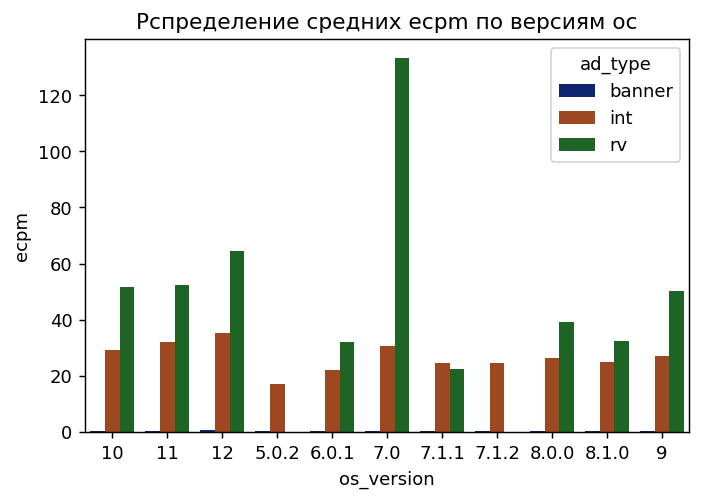

In [55]:
sns.barplot(data=avg_os_ecpm, x='os_version', y='ecpm', hue='ad_type', order=avg_os_ecpm.os_version.unique(), palette='dark', ci=None).set(title='Рспределение средних ecpm по версиям ос')

In [56]:
ecpm_df[(ecpm_df.os_version == '7.0') & (ecpm_df.ad_type == 'rv')].ecpm.count()

4

На графике виден аномально высокий средний rv ecpm у пользователей c 7.0 версией ос, это также объясняется малой выборкой для расчета ecpm. В остальном средние ecpm распределены равномерно, только у более новых версий он немного побольше. Распределение баннеров плохо видно, его можно вывести отдельно.

In [57]:
banner_avg_os_ecpm = ecpm_df[ecpm_df.ad_type == 'banner'].groupby(['ad_type', 'os_version']).agg({'ecpm': 'mean'}).reset_index().sort_values(by='ecpm', ascending=False)

[Text(0.5, 1.0, 'Гистограмма средних ecpm по версиям ос(баннер)')]

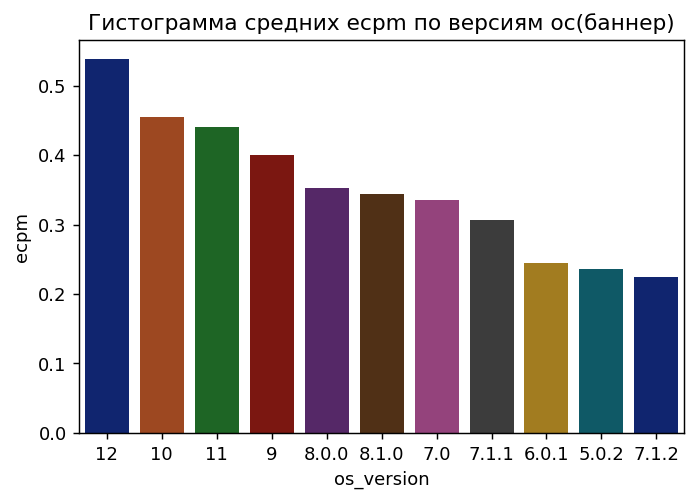

In [58]:
sns.barplot(data=banner_avg_os_ecpm, x='os_version', y='ecpm', order=banner_avg_os_ecpm.os_version, palette='dark', ci=None).set(title='Гистограмма средних ecpm по версиям ос(баннер)')

У последних версий ос более большой средний ecpm

### 1.c Для каждого формата рекламы: отобразить суммарные доходы по городам, версиям ОС

In [59]:
ecpm_df['ads_ltv'] = js_df.ads_ltv

In [60]:
sum_ltv_all = ecpm_df.groupby(['profile_id', 'ad_type']).agg({'ads_ltv': 'max'}).reset_index()
sum_ltv_all = sum_ltv_all.groupby(['ad_type']).agg({'ads_ltv': 'sum'}).reset_index()

[Text(0.5, 1.0, 'Суммарные доходы по типам рекламы')]

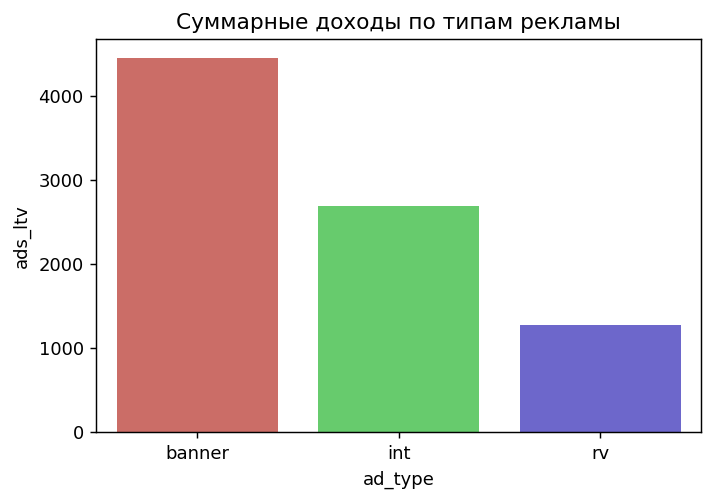

In [61]:
sns.barplot(data=sum_ltv_all, x='ad_type', y='ads_ltv', palette='hls').set(title='Суммарные доходы по типам рекламы')

По этому графику видно, что хоть у банерной рекламы низкие показатели ecpm, но из-за того что ее преобладающее большинство, она дает больший доход

In [62]:
sum_ltv = ecpm_df.groupby(['profile_id', 'ad_type', 'city']).agg({'ads_ltv': 'max'}).reset_index()
sum_ltv = sum_ltv.groupby(['ad_type', 'city']).agg({'ads_ltv': 'sum'}).reset_index()

In [63]:
top_city_list = ecpm_df.groupby(['profile_id', 'city']).agg({'ads_ltv': 'max'}).reset_index()
top_city_list = top_city_list.groupby(['city']).agg('sum').reset_index().sort_values(by='ads_ltv', ascending=False)
top_city_list = top_city_list.sort_values(by='ads_ltv', ascending=False).head(10).city.tolist()

In [64]:
tmp = sum_ltv[sum_ltv.city.isin(top_city_list)]

In [65]:
top_city_list = [str[:3] for str in top_city_list]

In [66]:
tmp['city'] = tmp['city'].apply(lambda x: x[:3])

[Text(0.5, 1.0, 'Топ 10 городов по суммарным доходам')]

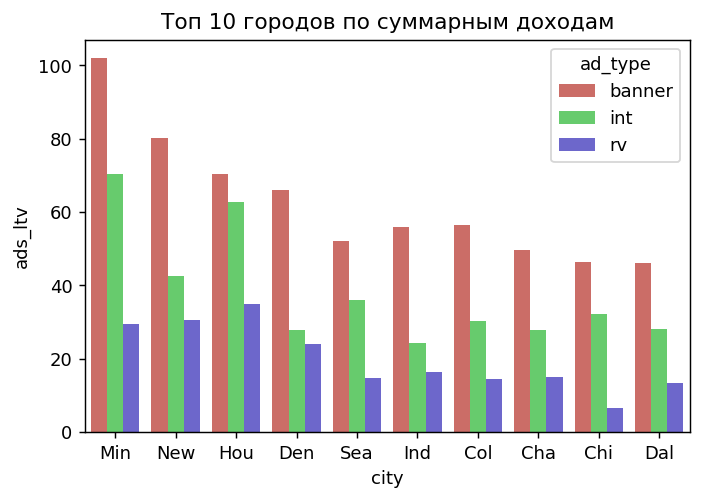

In [67]:
sns.barplot(data=tmp, x='city', y='ads_ltv', hue='ad_type', order=top_city_list, palette='hls', ci=None).set(title='Топ 10 городов по суммарным доходам')

In [68]:
top_banner_city_list = ecpm_df[ecpm_df.ad_type == 'banner'].groupby(['profile_id', 'city']).agg({'ads_ltv': 'max'}).reset_index()
top_banner_city_list = top_banner_city_list.groupby(['city']).agg('sum').reset_index().sort_values(by='ads_ltv', ascending=False)
top_banner_city_list = top_banner_city_list.sort_values(by='ads_ltv', ascending=False).head(10).city.tolist()

In [69]:
tmp = sum_ltv[(sum_ltv.ad_type == 'banner') & (sum_ltv.city.isin(top_banner_city_list))]

In [70]:
top_banner_city_list = [str[:3] for str in top_banner_city_list]

In [71]:
tmp['city'] = tmp['city'].apply(lambda x: x[:3])

[Text(0.5, 1.0, 'Топ 10 городов по суммарным доходам с типом рекламы банер')]

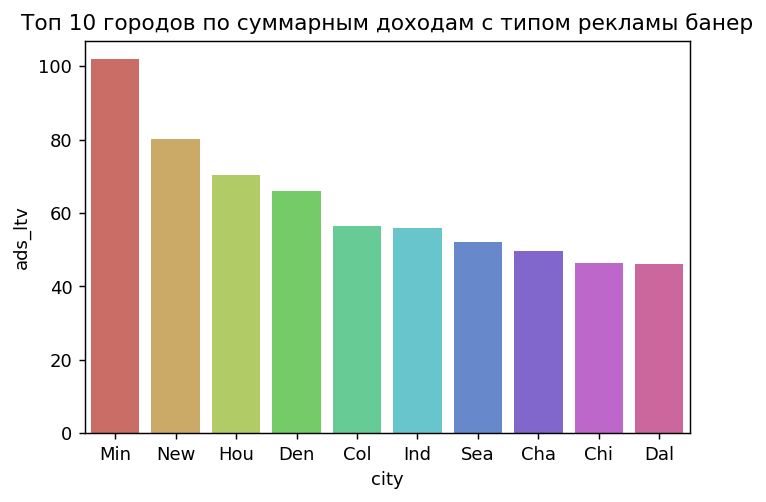

In [72]:
sns.barplot(data=tmp, x='city', y='ads_ltv', order=top_banner_city_list, palette='hls', ci=None).set(title='Топ 10 городов по суммарным доходам с типом рекламы банер')

In [73]:
top_int_city_list = ecpm_df[ecpm_df.ad_type == 'int'].groupby(['profile_id', 'city']).agg({'ads_ltv': 'max'}).reset_index()
top_int_city_list = top_int_city_list.groupby(['city']).agg('sum').reset_index().sort_values(by='ads_ltv', ascending=False)
top_int_city_list = top_int_city_list.sort_values(by='ads_ltv', ascending=False).head(10).city.tolist()

In [74]:
tmp = sum_ltv[(sum_ltv.ad_type == 'int') & (sum_ltv.city.isin(top_int_city_list))]

In [75]:
top_int_city_list = [str[:3] for str in top_int_city_list]

In [76]:
tmp['city'] = tmp['city'].apply(lambda x: x[:3])

[Text(0.5, 1.0, 'Топ 10 городов по суммарным доходам с типом полноэкранная реклама')]

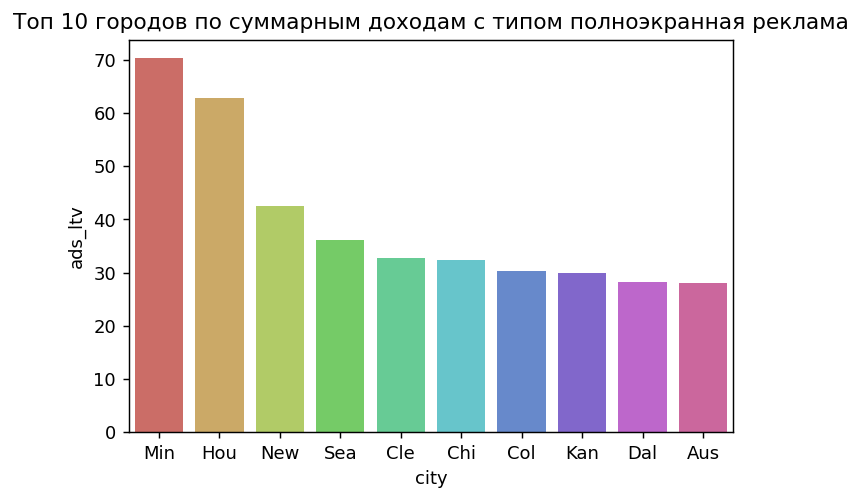

In [77]:
sns.barplot(data=tmp, x='city', y='ads_ltv', order=top_int_city_list, palette='hls', ci=None).set(title='Топ 10 городов по суммарным доходам с типом полноэкранная реклама')

In [78]:
top_rv_city_list = ecpm_df[ecpm_df.ad_type == 'rv'].groupby(['profile_id', 'city']).agg({'ads_ltv': 'max'}).reset_index()
top_rv_city_list = top_rv_city_list.groupby(['city']).agg('sum').reset_index().sort_values(by='ads_ltv', ascending=False)
top_rv_city_list = top_rv_city_list.sort_values(by='ads_ltv', ascending=False).head(10).city.tolist()

In [79]:
tmp = sum_ltv[(sum_ltv.ad_type == 'rv') & (sum_ltv.city.isin(top_rv_city_list))]

In [80]:
top_rv_city_list = [str[:3] for str in top_rv_city_list]

In [81]:
tmp['city'] = tmp['city'].apply(lambda x: x[:3])

[Text(0.5, 1.0, 'Топ 10 городов по суммарным доходам с типом видео реклама')]

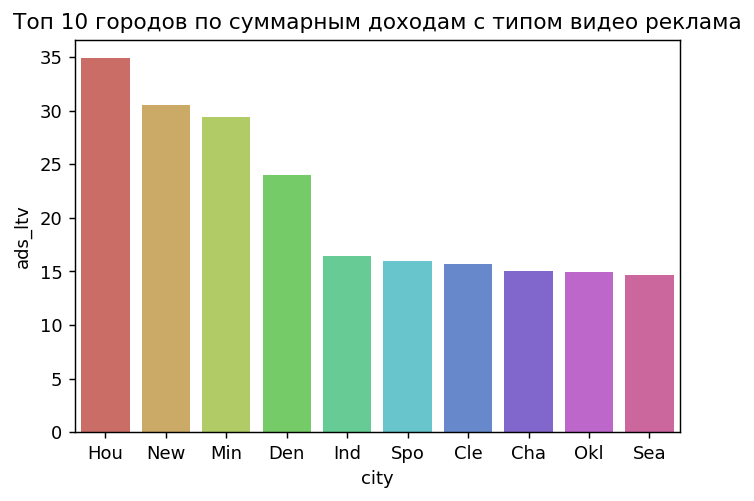

In [82]:
sns.barplot(data=tmp, x='city', y='ads_ltv', order=top_rv_city_list, palette='hls', ci=None).set(title='Топ 10 городов по суммарным доходам с типом видео реклама')

По графикам топ городов, видно что больший доход приносят крупные города. Но странно, что самый прибыльный город это Миннеаполис, а не Нью-Йорк или Чикаго к примеру.

In [83]:
sum_ltv = ecpm_df.groupby(['profile_id', 'ad_type', 'os_version']).agg({'ads_ltv': 'max'})

In [84]:
sum_ltv = sum_ltv.reset_index()

In [85]:
sum_ltv = sum_ltv.groupby(['ad_type', 'os_version']).agg('sum').reset_index()

In [86]:
plt.rcParams['figure.dpi'] = 200

[Text(0.5, 1.0, 'Распределение доходов по версиям ос')]

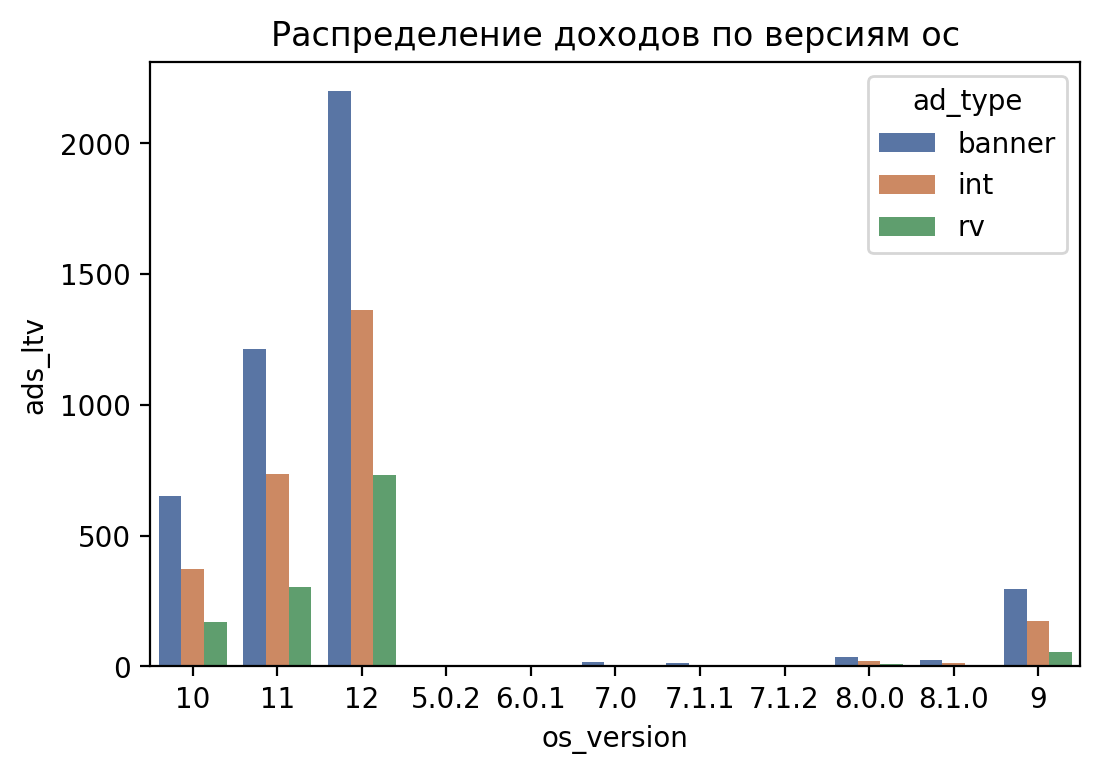

In [87]:
sns.barplot(data=sum_ltv, x='os_version', y='ads_ltv', hue='ad_type', palette='deep').set(title='Распределение доходов по версиям ос')

[Text(0.5, 1.0, 'Распределение доходов по старым версиям ос')]

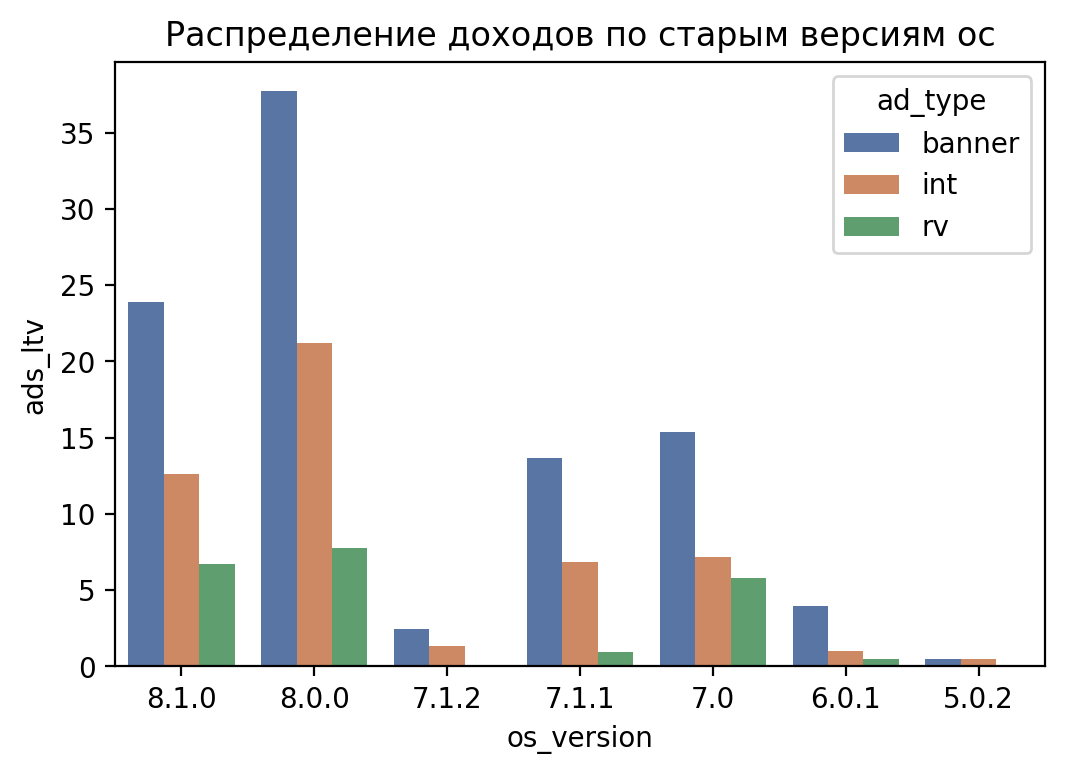

In [88]:
sns.barplot(data=sum_ltv[sum_ltv.ads_ltv < 50], x='os_version', y='ads_ltv', hue='ad_type',order=['8.1.0', '8.0.0', '7.1.2', '7.1.1', '7.0', '6.0.1', '5.0.2'], palette='deep').set(title='Распределение доходов по старым версиям ос')

[Text(0.5, 1.0, 'Распределение доходов по новым версиям ос')]

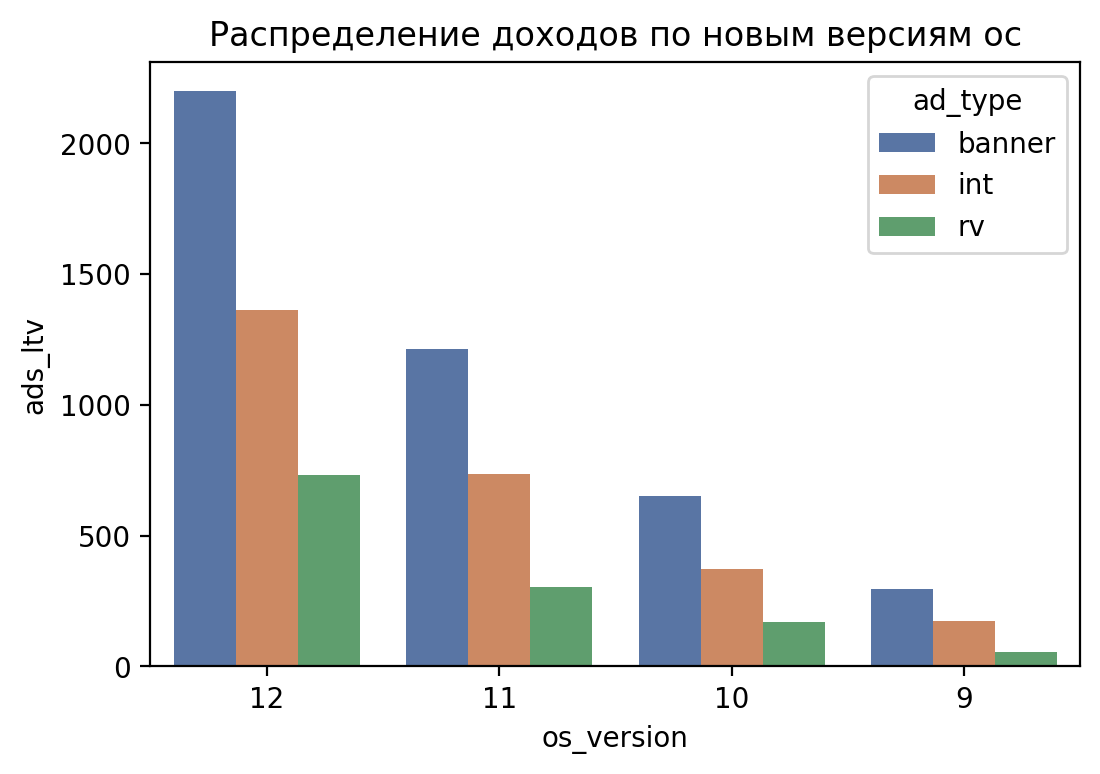

In [89]:
sns.barplot(data=sum_ltv[sum_ltv.ads_ltv >= 50], x='os_version', y='ads_ltv', hue='ad_type', order=['12', '11', '10', '9'], palette='deep').set(title='Распределение доходов по новым версиям ос')

По графикам распределения доходов по версиям ос, можно сделать вывод, что в основном играют с устройств с одной из последних операционных систем

## 2. Учесть статистическую значимость для п.1b (отобразить, отфильтровать незначимое или хотя бы прокомментировать). Объяснить решение.

In [90]:
general_selection_df = pd.DataFrame()

In [91]:
for i in ad_type_list:
  general_selection_df[i] = ecpm_df[ecpm_df.ad_type == i].reset_index().ecpm

Чтобы учесть статистическую значимость между группами можно провести односторонний Annova test. Но для его проведения нужно чтобы значения были распределенны близко к нормальному. Для этого можно взять логарифм от каждого значения ecpm, тк их распределение близко к логнормальному.

### 2.1 Распределения по городам

Проводить тест по всем городам я думаю бессмысленно, тк в группах точно будут различия из-за малой выборки большинства городов. Тест будет проводиться по топ 10 городам по количеству показов.

Нулевой гипотезой будет гипотеза о том, что средние групп равны. Альтернативной гипотезой будет *гипотеза*, что хотябы одно среднее отличается.

тк групп много уровень значимости будет равен: α=0.01

In [92]:
most_count_city_list = ecpm_df.groupby('city').agg({'device_manufacturer' :'count'}).reset_index().sort_values(by='device_manufacturer', ascending=False)
most_count_city_list = most_count_city_list.head(10).city.tolist()

In [93]:
banner_city_selection = ecpm_df[(ecpm_df.ad_type == 'banner') & (ecpm_df.city.isin(most_count_city_list))]

In [94]:
banner_city_selection.insert(len(banner_city_selection.columns), 'ecpm_log', np.log(banner_city_selection.ecpm))

In [95]:
banner_city_selection = banner_city_selection[['city', 'ecpm_log']]
banner_city_selection.groupby('city').agg({'ecpm_log': 'describe'})

ecpm_log                                                    \
                count      mean       std       min       25%       50%   
city                                                                      
Charlotte      7855.0 -0.930742  0.925026 -3.292332 -1.379350 -0.788285   
Chicago        7018.0 -1.476599  0.973287 -3.293675 -2.256426 -1.332123   
Columbus       5142.0 -0.849597  0.840615 -3.288881 -1.268553 -0.672531   
Denver         5415.0 -1.107294  0.878022 -3.293474 -1.551678 -0.838931   
Houston        7734.0 -1.046264  0.933083 -3.290972 -1.694930 -0.819295   
Indianapolis   5287.0 -0.521677  0.903727 -3.287976 -0.822777 -0.589230   
Kansas City    5346.0 -1.537597  1.044541 -3.293229 -2.498017 -1.546733   
Minneapolis   10495.0 -1.097148  0.904837 -3.293498 -1.702606 -0.830317   
New York      12821.0 -0.887632  0.918688 -3.293647 -1.162489 -0.688687   
Springfield    8532.0 -0.836482  0.617437 -3.292019 -0.789437 -0.671779   

                                  
                   75%       max  
city                              
Charlotte    -0.512594  0.633259  
Chicago      -0.713844  0.631615  
Columbus     -0.473909  0.633423  
Denver       -0.623176  0.632068  
Houston      -0.540316  0.633371  
Indianapolis  0.256977  0.633429  
Kansas City  -0.633618  0.632862  
Minneapolis  -0.585982  0.633065  
New York     -0.422761  0.633386  
Springfield  -0.628513  0.631093

In [96]:
model = ols('ecpm_log ~ city', data = banner_city_selection).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ecpm_log   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     697.7
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:30:02   Log-Likelihood:                -99023.
No. Observations:               75645   AIC:                         1.981e+05
Df Residuals:                   75635   BIC:                         1.982e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.9307      0.010    -92.066      0.000      -0.951      -0.911
city[T.Chicago]         -0.5459      0.015    -37.090      0.000      -0.575      -0.517
city[T.Columbus]         0.0811      0.016      5.049      0.000       0.050       0.113
city[T.Denver]          -0.1766      0.016    -11.156      0.000      -0.208      -0.146
city[T.Houston]         -0.1155      0.014     -8.049      0.000      -0.144      -0.087
city[T.Indianapolis]     0.4091      0.016     25.665      0.000       0.378       0.440
city[T.Kansas City]     -0.6069      0.016    -38.200      0.000      -0.638      -0.576
city[T.Minneapolis]     -0.1664      0.013    -12.448      0.000      -0.193      -0.140
city[T.New York]         0.0431      0.013      3.358      0.001       0.018       0.068
city[T.Springfield]      0.0943      0.014      6.728      0.000       0.067       0.122
==============================================================================
Omnibus:                     3622.662   Durbin-Watson:                   0.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4170.754
Skew:                          -0.575   Prob(JB):                         0.00
Kurtosis:                       3.051   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
int_city_selection = ecpm_df[(ecpm_df.ad_type == 'int') & (ecpm_df.city.isin(most_count_city_list))]

In [98]:
int_city_selection.insert(len(int_city_selection.columns), 'ecpm_log', np.log(int_city_selection.ecpm))

In [99]:
int_city_selection = int_city_selection[['city', 'ecpm_log']]
int_city_selection.groupby('city').agg({'ecpm_log': 'describe'})

ecpm_log                                                    \
                count      mean       std       min       25%       50%   
city                                                                      
Charlotte       386.0  3.180506  0.569594  2.349127  2.649284  3.142167   
Chicago         281.0  3.161181  0.521458  2.346170  2.783517  3.041723   
Columbus        236.0  3.502311  0.584891  2.369072  3.005361  3.357142   
Denver          248.0  3.334491  0.470570  2.430311  2.990620  3.290168   
Houston         426.0  3.408784  0.588793  2.362324  2.871285  3.337706   
Indianapolis    227.0  3.251529  0.575119  2.360051  2.812648  3.109619   
Kansas City     212.0  3.379145  0.467387  2.351711  3.040842  3.228202   
Minneapolis     583.0  3.163447  0.536640  2.347002  2.737852  3.068421   
New York        530.0  3.239801  0.555636  2.367634  2.763640  3.129270   
Springfield     324.0  3.018163  0.513933  2.346916  2.638822  2.901296   

                                  
                   75%       max  
city                              
Charlotte     3.605320  4.598369  
Chicago       3.351727  4.600747  
Columbus      3.901648  4.641492  
Denver        3.685419  4.397099  
Houston       3.973689  4.621168  
Indianapolis  3.578193  4.631497  
Kansas City   3.726674  4.618777  
Minneapolis   3.434960  4.627879  
New York      3.635870  4.632906  
Springfield   3.185330  4.639517

In [100]:
model = ols('ecpm_log ~ city', data = int_city_selection).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ecpm_log   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     21.36
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.56e-35
Time:                        15:30:02   Log-Likelihood:                -2795.2
No. Observations:                3453   AIC:                             5610.
Df Residuals:                    3443   BIC:                             5672.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.1805      0.028    114.773      0.000       3.126       3.235
city[T.Chicago]         -0.0193      0.043     -0.453      0.651      -0.103       0.064
city[T.Columbus]         0.3218      0.045      7.153      0.000       0.234       0.410
city[T.Denver]           0.1540      0.044      3.475      0.001       0.067       0.241
city[T.Houston]          0.2283      0.038      5.967      0.000       0.153       0.303
city[T.Indianapolis]     0.0710      0.046      1.560      0.119      -0.018       0.160
city[T.Kansas City]      0.1986      0.047      4.268      0.000       0.107       0.290
city[T.Minneapolis]     -0.0171      0.036     -0.477      0.633      -0.087       0.053
city[T.New York]         0.0593      0.036      1.628      0.104      -0.012       0.131
city[T.Springfield]     -0.1623      0.041     -3.957      0.000      -0.243      -0.082
==============================================================================
Omnibus:                      240.834   Durbin-Watson:                   0.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.899
Skew:                           0.573   Prob(JB):                     1.97e-50
Kurtosis:                       2.472   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
rv_city_selection = ecpm_df[(ecpm_df.ad_type == 'banner') & (ecpm_df.city.isin(most_count_city_list))]

In [102]:
rv_city_selection.insert(len(rv_city_selection.columns), 'ecpm_log', np.log(rv_city_selection.ecpm))

In [103]:
rv_city_selection = rv_city_selection[['city', 'ecpm_log']]
rv_city_selection.groupby('city').agg({'ecpm_log': 'describe'})

ecpm_log                                                    \
                count      mean       std       min       25%       50%   
city                                                                      
Charlotte      7855.0 -0.930742  0.925026 -3.292332 -1.379350 -0.788285   
Chicago        7018.0 -1.476599  0.973287 -3.293675 -2.256426 -1.332123   
Columbus       5142.0 -0.849597  0.840615 -3.288881 -1.268553 -0.672531   
Denver         5415.0 -1.107294  0.878022 -3.293474 -1.551678 -0.838931   
Houston        7734.0 -1.046264  0.933083 -3.290972 -1.694930 -0.819295   
Indianapolis   5287.0 -0.521677  0.903727 -3.287976 -0.822777 -0.589230   
Kansas City    5346.0 -1.537597  1.044541 -3.293229 -2.498017 -1.546733   
Minneapolis   10495.0 -1.097148  0.904837 -3.293498 -1.702606 -0.830317   
New York      12821.0 -0.887632  0.918688 -3.293647 -1.162489 -0.688687   
Springfield    8532.0 -0.836482  0.617437 -3.292019 -0.789437 -0.671779   

                                  
                   75%       max  
city                              
Charlotte    -0.512594  0.633259  
Chicago      -0.713844  0.631615  
Columbus     -0.473909  0.633423  
Denver       -0.623176  0.632068  
Houston      -0.540316  0.633371  
Indianapolis  0.256977  0.633429  
Kansas City  -0.633618  0.632862  
Minneapolis  -0.585982  0.633065  
New York     -0.422761  0.633386  
Springfield  -0.628513  0.631093

In [104]:
model = ols('ecpm_log ~ city', data = rv_city_selection).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ecpm_log   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     697.7
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:30:03   Log-Likelihood:                -99023.
No. Observations:               75645   AIC:                         1.981e+05
Df Residuals:                   75635   BIC:                         1.982e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.9307      0.010    -92.066      0.000      -0.951      -0.911
city[T.Chicago]         -0.5459      0.015    -37.090      0.000      -0.575      -0.517
city[T.Columbus]         0.0811      0.016      5.049      0.000       0.050       0.113
city[T.Denver]          -0.1766      0.016    -11.156      0.000      -0.208      -0.146
city[T.Houston]         -0.1155      0.014     -8.049      0.000      -0.144      -0.087
city[T.Indianapolis]     0.4091      0.016     25.665      0.000       0.378       0.440
city[T.Kansas City]     -0.6069      0.016    -38.200      0.000      -0.638      -0.576
city[T.Minneapolis]     -0.1664      0.013    -12.448      0.000      -0.193      -0.140
city[T.New York]         0.0431      0.013      3.358      0.001       0.018       0.068
city[T.Springfield]      0.0943      0.014      6.728      0.000       0.067       0.122
==============================================================================
Omnibus:                     3622.662   Durbin-Watson:                   0.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4170.754
Skew:                          -0.575   Prob(JB):                         0.00
Kurtosis:                       3.051   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Все тесты выявили значимые различия между выборками(у всех тестов p value меньше 0.01)

### 2.2 Распределения по версиям ос

In [105]:
banner_os_selection = pd.DataFrame()

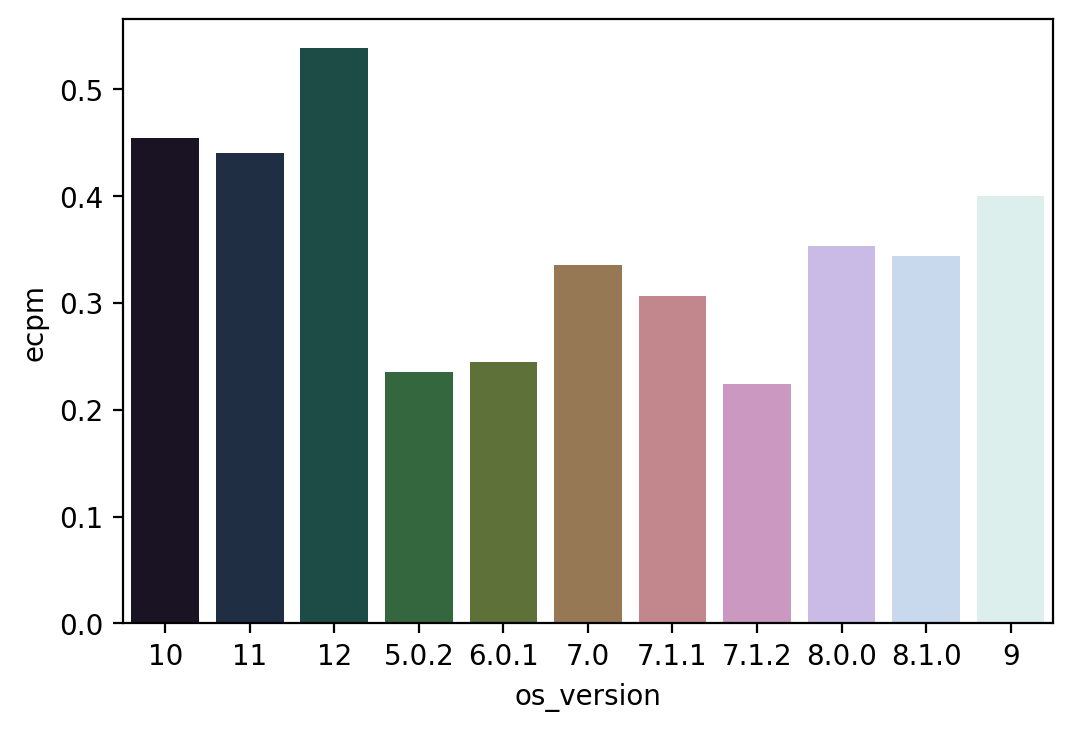

In [106]:
sns.barplot(data=ecpm_df[ecpm_df.ad_type == 'banner'].groupby('os_version').agg({'ecpm': 'mean'}).reset_index(), y='ecpm', x='os_version', palette='cubehelix')

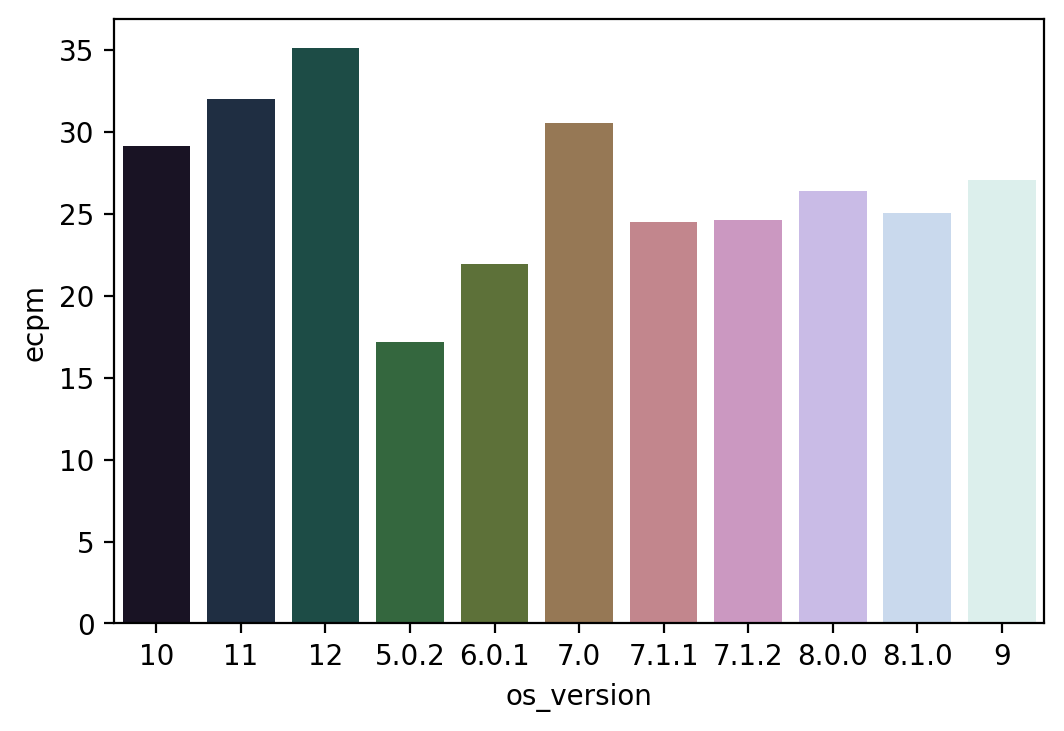

In [107]:
sns.barplot(data=ecpm_df[ecpm_df.ad_type == 'int'].groupby('os_version').agg({'ecpm': 'mean'}).reset_index(), y='ecpm', x='os_version', palette='cubehelix')

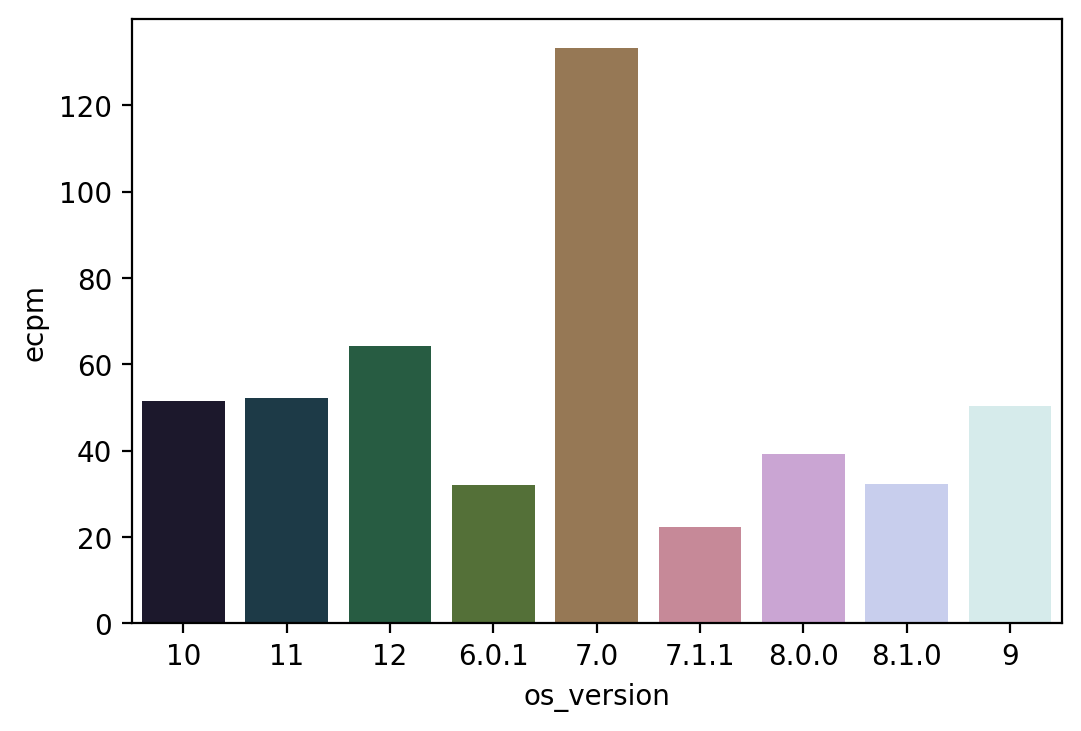

In [108]:
sns.barplot(data=ecpm_df[ecpm_df.ad_type == 'rv'].groupby('os_version').agg({'ecpm': 'mean'}).reset_index(), y='ecpm', x='os_version', palette='cubehelix')

In [109]:
banner_os_selection = ecpm_df[ecpm_df.ad_type == 'banner']

In [110]:
banner_os_selection.insert(len(banner_os_selection.columns), 'ecpm_log', np.log(banner_os_selection.ecpm))

In [111]:
banner_os_selection = banner_os_selection[['os_version', 'ecpm_log']]
banner_os_selection.groupby('os_version').agg({'ecpm_log': 'describe'})

ecpm_log                                                    \
               count      mean       std       min       25%       50%   
os_version                                                               
10          119155.0 -1.140637  0.915183 -3.293720 -1.762976 -0.826140   
11          148786.0 -1.240181  0.988146 -3.293775 -2.022080 -0.941928   
12          311592.0 -0.951340  0.900963 -3.293798 -1.380951 -0.703226   
5.0.2          626.0 -1.852770  0.867767 -3.282766 -2.516112 -2.157955   
6.0.1          623.0 -1.772896  0.873298 -3.276482 -2.586820 -1.794168   
7.0           3015.0 -1.567178  1.037510 -3.293035 -2.605091 -1.390844   
7.1.1         1062.0 -1.757929  1.048437 -3.293289 -2.624561 -2.014616   
7.1.2         1213.0 -1.907903  0.878685 -3.288184 -2.656418 -1.992054   
8.0.0         6250.0 -1.389461  0.904290 -3.293537 -2.113537 -1.145565   
8.1.0         7590.0 -1.419556  0.887748 -3.292307 -2.090638 -1.308855   
9            52860.0 -1.245567  0.883247 -3.293801 -1.881205 -0.952676   

                                
                 75%       max  
os_version                      
10         -0.621009  0.633429  
11         -0.615940  0.633423  
12         -0.529058  0.633429  
5.0.2      -1.142235  0.626964  
6.0.1      -0.970518  0.568158  
7.0        -0.691225  0.624558  
7.1.1      -0.983065  0.619700  
7.1.2      -1.211836  0.603816  
8.0.0      -0.683593  0.630754  
8.1.0      -0.701320  0.630040  
9          -0.646905  0.631615

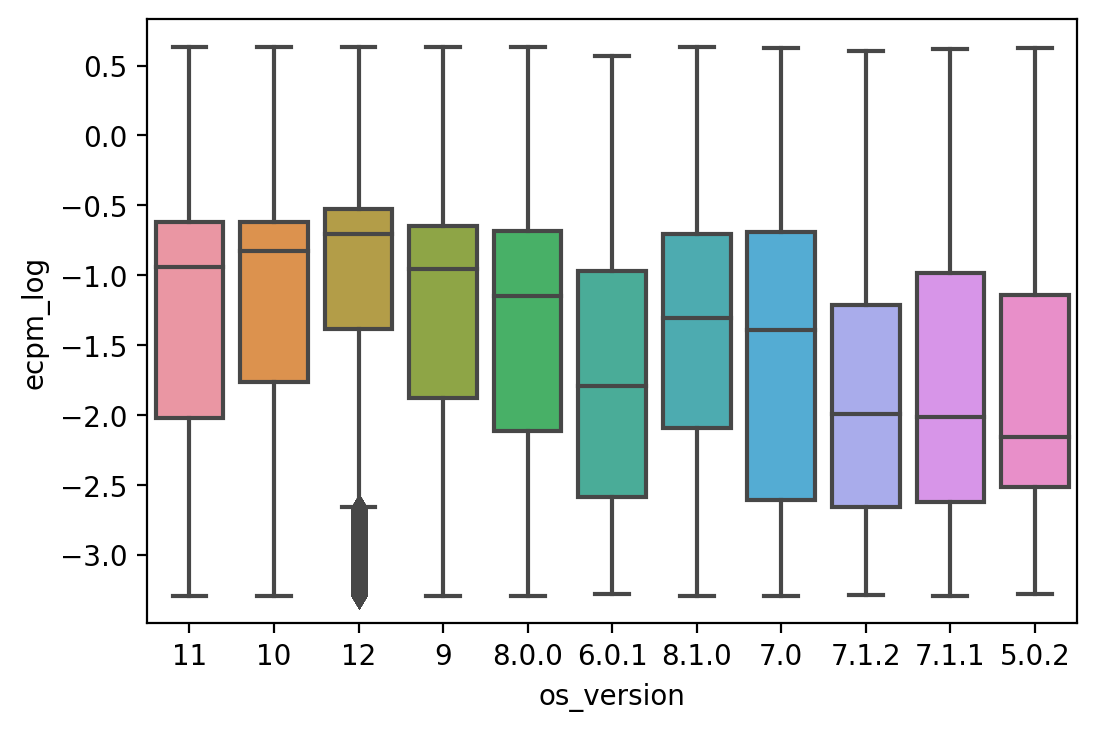

In [112]:
sns.boxplot(x='os_version', y='ecpm_log', data=banner_os_selection)

In [141]:
model = ols('ecpm_log ~ os_version', data = banner_os_selection).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ecpm_log   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1752.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:43:28   Log-Likelihood:            -8.7424e+05
No. Observations:              652772   AIC:                         1.748e+06
Df Residuals:                  652761   BIC:                         1.749e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.1406      0.003   -426.383      0.000      -1.146      -1.135
os_version[T.11]       -0.0995      0.004    -27.728      0.000      -0.107      -0.093
os_version[T.12]        0.1893      0.003     60.184      0.000       0.183       0.195
os_version[T.5.0.2]    -0.7121      0.037    -19.244      0.000      -0.785      -0.640
os_version[T.6.0.1]    -0.6323      0.037    -17.045      0.000      -0.705      -0.560
os_version[T.7.0]      -0.4265      0.017    -25.048      0.000      -0.460      -0.393
os_version[T.7.1.1]    -0.6173      0.028    -21.688      0.000      -0.673      -0.562
os_version[T.7.1.2]    -0.7673      0.027    -28.792      0.000      -0.819      -0.715
os_version[T.8.0.0]    -0.2488      0.012    -20.765      0.000      -0.272      -0.225
os_version[T.8.1.0]    -0.2789      0.011    -25.514      0.000      -0.300      -0.257
os_version[T.9]        -0.1049      0.005    -21.744      0.000      -0.114      -0.095
==============================================================================
Omnibus:                    31149.100   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34090.425
Skew:                          -0.541   Prob(JB):                         0.00
Kurtosis:                       2.711   Cond. No.                         37.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
int_os_selection = ecpm_df[ecpm_df.ad_type == 'int']

In [115]:
int_os_selection.insert(len(int_os_selection.columns), 'ecpm_log', np.log(int_os_selection.ecpm))

In [116]:
int_os_selection = int_os_selection[['os_version', 'ecpm_log']]
int_os_selection.groupby('os_version').agg({'ecpm_log': 'describe'})

ecpm_log                                                    \
              count      mean       std       min       25%       50%   
os_version                                                              
10           5114.0  3.200792  0.564803  2.341500  2.736693  3.086970   
11           8304.0  3.289776  0.582995  2.341097  2.828405  3.184542   
12          13521.0  3.391211  0.573287  2.341530  2.957004  3.314142   
5.0.2          21.0  2.831107  0.159814  2.404130  2.802472  2.830296   
6.0.1          26.0  2.962154  0.442314  2.347428  2.643908  2.916807   
7.0           132.0  3.227004  0.592024  2.383426  2.795289  2.995668   
7.1.1          60.0  3.123589  0.354892  2.636739  2.870998  3.063016   
7.1.2          46.0  3.015961  0.602561  2.348920  2.479566  2.823363   
8.0.0         234.0  3.067277  0.622829  2.341723  2.492951  2.858044   
8.1.0         219.0  3.096411  0.478075  2.341697  2.715471  3.062206   
9            2409.0  3.133906  0.537313  2.342462  2.711896  3.035258   

                                
                 75%       max  
os_version                      
10          3.610787  4.641736  
11          3.754784  4.644340  
12          3.845402  4.643855  
5.0.2       2.891235  3.086372  
6.0.1       3.064634  4.356897  
7.0         3.678642  4.622464  
7.1.1       3.267249  4.591314  
7.1.2       3.567654  4.203060  
8.0.0       3.595443  4.483363  
8.1.0       3.328681  4.475836  
9           3.457975  4.644179

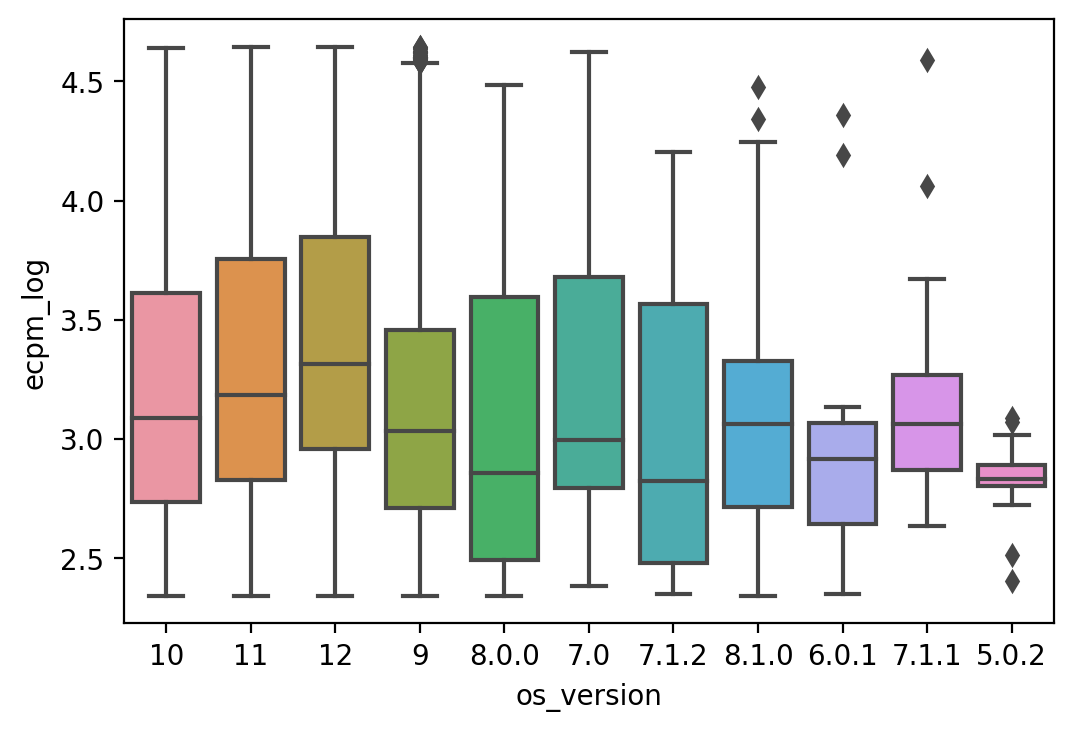

In [117]:
sns.boxplot(x='os_version', y='ecpm_log', data=int_os_selection)

In [118]:
model = ols('ecpm_log ~ os_version', data = int_os_selection).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ecpm_log   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     81.42
Date:                Mon, 20 Jun 2022   Prob (F-statistic):          3.71e-166
Time:                        15:30:12   Log-Likelihood:                -25828.
No. Observations:               30086   AIC:                         5.168e+04
Df Residuals:                   30075   BIC:                         5.177e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.2008      0.008    400.840      0.000       3.185       3.216
os_version[T.11]        0.0890      0.010      8.766      0.000       0.069       0.109
os_version[T.12]        0.1904      0.009     20.313      0.000       0.172       0.209
os_version[T.5.0.2]    -0.3697      0.125     -2.961      0.003      -0.614      -0.125
os_version[T.6.0.1]    -0.2386      0.112     -2.125      0.034      -0.459      -0.019
os_version[T.7.0]       0.0262      0.050      0.521      0.603      -0.072       0.125
os_version[T.7.1.1]    -0.0772      0.074     -1.041      0.298      -0.223       0.068
os_version[T.7.1.2]    -0.1848      0.085     -2.185      0.029      -0.351      -0.019
os_version[T.8.0.0]    -0.1335      0.038     -3.497      0.000      -0.208      -0.059
os_version[T.8.1.0]    -0.1044      0.039     -2.649      0.008      -0.182      -0.027
os_version[T.9]        -0.0669      0.014     -4.740      0.000      -0.095      -0.039
==============================================================================
Omnibus:                     2948.514   Durbin-Watson:                   0.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1432.187
Skew:                           0.366   Prob(JB):                    1.01e-311
Kurtosis:                       2.221   Cond. No.                         43.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
rv_os_selection = ecpm_df[ecpm_df.ad_type == 'rv']

In [120]:
rv_os_selection.insert(len(rv_os_selection.columns), 'ecpm_log', np.log(rv_os_selection.ecpm))

In [121]:
rv_os_selection = rv_os_selection[['os_version', 'ecpm_log']]
rv_os_selection.groupby('os_version').agg({'ecpm_log': 'describe'})

ecpm_log                                                    \
              count      mean       std       min       25%       50%   
os_version                                                              
10            818.0  3.750341  0.592321  2.885022  3.317549  3.566366   
11           1533.0  3.749523  0.602018  2.886663  3.320527  3.476474   
12           2441.0  3.950646  0.639297  2.883369  3.347303  3.863538   
6.0.1           2.0  3.462749  0.183907  3.332707  3.397728  3.462749   
7.0             4.0  4.759397  0.613245  4.094505  4.310098  4.823774   
7.1.1           4.0  3.093336  0.157189  2.978637  3.009883  3.034819   
8.0.0          53.0  3.546297  0.447626  3.057347  3.302693  3.347609   
8.1.0          31.0  3.446399  0.228105  3.285282  3.317486  3.384581   
9             298.0  3.683860  0.626834  2.908883  3.263977  3.334791   

                                
                 75%       max  
os_version                      
10          4.301546  5.309014  
11          4.298469  5.316194  
12          4.381963  5.319900  
6.0.1       3.527770  3.592791  
7.0         5.273072  5.295534  
7.1.1       3.118272  3.325068  
8.0.0       3.601315  4.984616  
8.1.0       3.431659  4.381963  
9           4.169675  5.278046

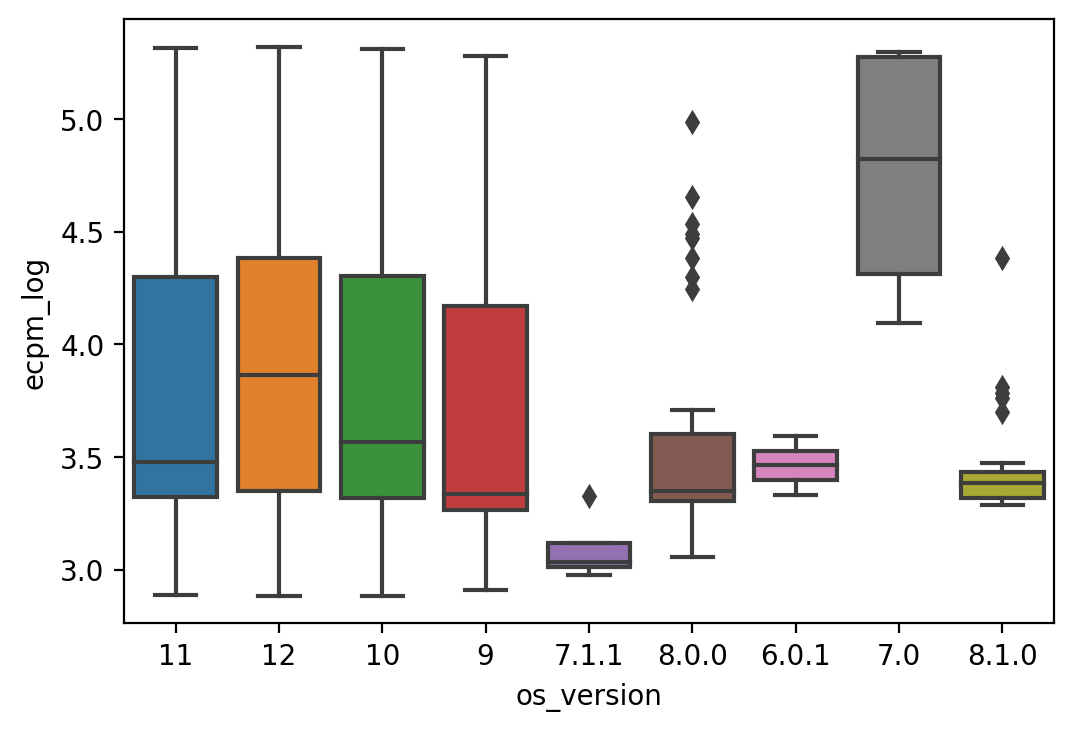

In [122]:
sns.boxplot(x='os_version', y='ecpm_log', data=rv_os_selection)

In [123]:
model = ols('ecpm_log ~ os_version', data = rv_os_selection).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ecpm_log   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     23.49
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.07e-35
Time:                        15:30:13   Log-Likelihood:                -4846.6
No. Observations:                5184   AIC:                             9711.
Df Residuals:                    5175   BIC:                             9770.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.7503      0.022    173.891      0.000       3.708       3.793
os_version[T.11]       -0.0008      0.027     -0.031      0.976      -0.053       0.052
os_version[T.12]        0.2003      0.025      8.038      0.000       0.151       0.249
os_version[T.6.0.1]    -0.2876      0.437     -0.659      0.510      -1.144       0.569
os_version[T.7.0]       1.0091      0.309      3.264      0.001       0.403       1.615
os_version[T.7.1.1]    -0.6570      0.309     -2.125      0.034      -1.263      -0.051
os_version[T.8.0.0]    -0.2040      0.087     -2.334      0.020      -0.375      -0.033
os_version[T.8.1.0]    -0.3039      0.113     -2.693      0.007      -0.525      -0.083
os_version[T.9]        -0.0665      0.042     -1.593      0.111      -0.148       0.015
==============================================================================
Omnibus:                      449.725   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              387.940
Skew:                           0.593   Prob(JB):                     5.75e-85
Kurtosis:                       2.377   Cond. No.                         59.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Все тесты выявили значимые различия между выборками(у всех тестов p value меньше 0.01)

## Доп задание №1

Какой процент доходов содержит информацию о городе юзера

## Доп задание №2

Зависит ли eCPM от времени дня

In [124]:
ecpm_df.event_datetime = pd.to_datetime(ecpm_df.event_datetime)

Для выявления зависимости, можно создать новый признак, обозначающий время дня:
1-утро, 2-день, 3-вечер, 4-ночь

In [125]:
conditions = [((ecpm_df['event_datetime'].dt.hour >= 7) & (ecpm_df['event_datetime'].dt.hour <= 11)),
              ((ecpm_df['event_datetime'].dt.hour > 11) & (ecpm_df['event_datetime'].dt.hour < 18)),
              ((ecpm_df['event_datetime'].dt.hour >= 18) & (ecpm_df['event_datetime'].dt.hour <= 23)),
              ((ecpm_df['event_datetime'].dt.hour < 7))]

In [126]:
choices = [1, 2, 3, 4]

In [127]:
ecpm_df['day_time'] = np.select(conditions, choices)

In [128]:
ecpm_df['day_time'].value_counts()

4    296079
3    194842
1    121607
2     75514
Name: day_time, dtype: int64

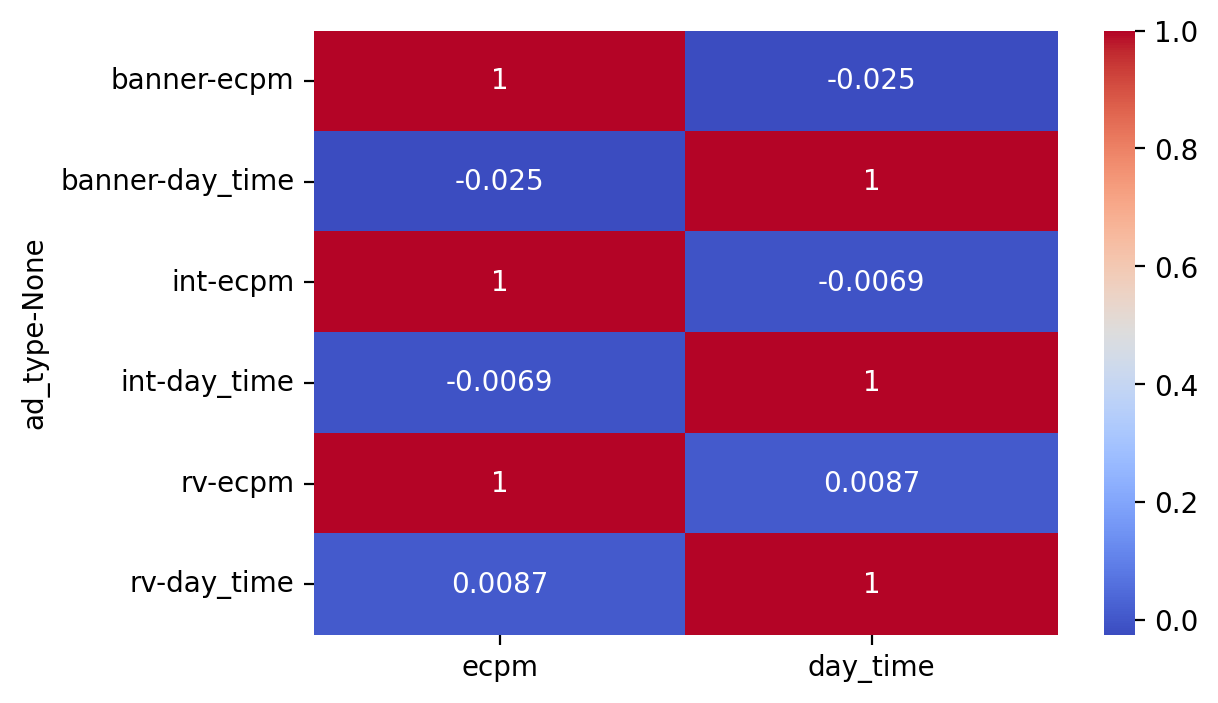

In [129]:
sns.heatmap(ecpm_df.drop(columns=['event_timestamp', 'event_receive_timestamp', 'ads_ltv']).groupby('ad_type').corr(), annot = True, cmap= 'coolwarm')

По этой тепловой таблице можно сделать вывод, что ecpm не зависит от времени дня

## 3

График активности по часам

In [130]:
ecpm_df['hour'] = ecpm_df.event_datetime.dt.hour

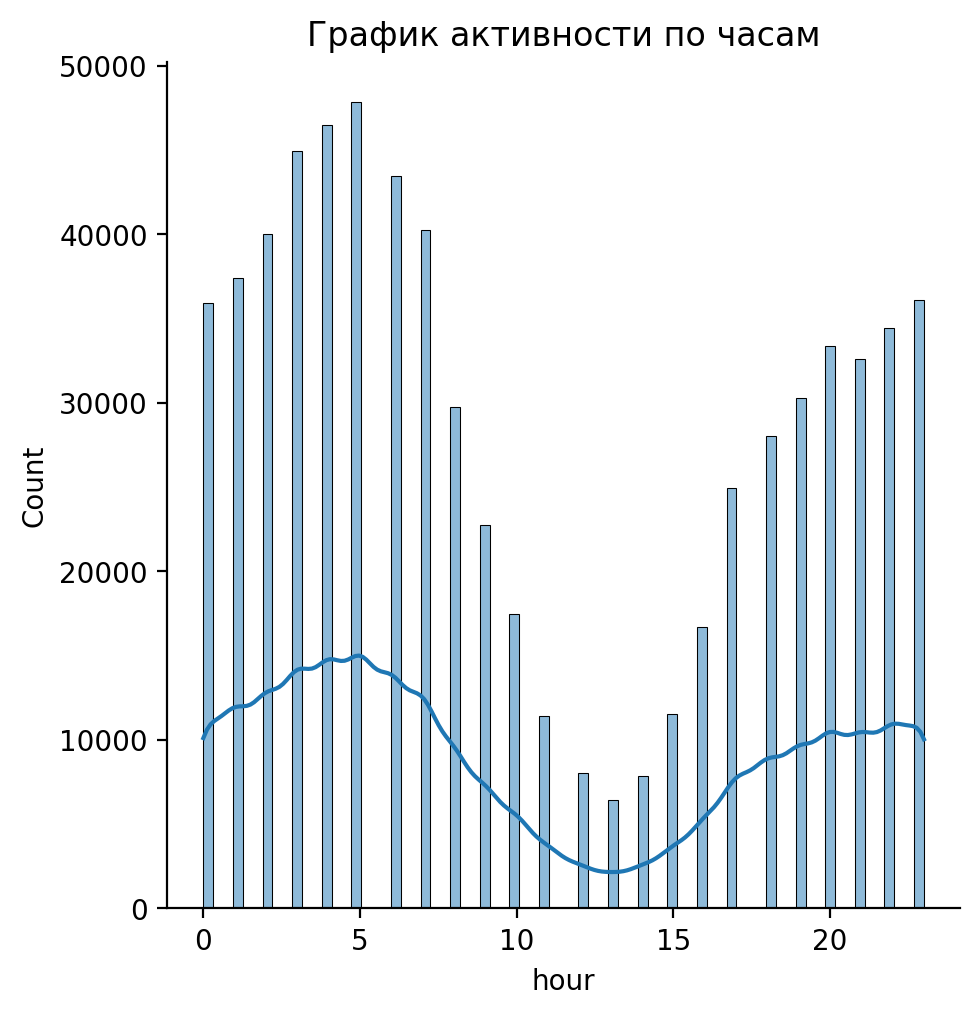

In [131]:
sns.displot(ecpm_df['hour'], kde=True).set(title='График активности по часам')

Проблема этого графика в том, что дата скорее всего хранится для каждого города своя, а в США много часовых поясов. Поэтому на графике нет спада в рабочее время, небольшого подъема в обед и тд.

In [132]:
ecpm_df['network_name'] = js_df.network_name

In [133]:
ecpm_df

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,...,connection_type,operator_name,country_iso_code,city,ad_type,ecpm,ads_ltv,day_time,hour,network_name
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,...,wifi,NaN,US,Norwalk,banner,0.511508,0.487877,3,20,Google AdMob
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,...,wifi,NaN,US,Norwalk,banner,0.511389,0.488387,3,20,Google AdMob
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,...,wifi,Verizon,US,Charlotte,banner,0.928597,0.678479,2,17,APPLOVIN_EXCHANGE
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,...,wifi,T-Mobile,US,Cocoa,int,13.782633,0.013894,2,17,AppLovin
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,...,cell,Verizon,US,NaN,banner,1.660282,0.060571,2,17,Google AdMob
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860056,JLSQY2nx1NQ,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 08:25:02,1643865902,...,wifi,Verizon,US,Elmira,banner,0.111643,1.007416,1,8,APPLOVIN_EXCHANGE
860057,JLSQY2nx1NQ,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 08:25:12,1643865912,...,wifi,Verizon,US,Elmira,banner,0.103628,1.007447,1,8,APPLOVIN_EXCHANGE
860058,JLSQY2nx1NQ,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 08:25:27,1643865927,...,wifi,Verizon,US,Elmira,banner,0.095154,1.007466,1,8,APPLOVIN_EXCHANGE
860059,JLSQY2nx1NQ,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 08:25:48,1643865948,...,wifi,Verizon,US,Elmira,banner,0.087685,1.007487,1,8,APPLOVIN_EXCHANGE


In [146]:
sum_network_ltv = ecpm_df.groupby(['profile_id', 'network_name', 'ad_type']).agg({'ads_ltv': 'max'}).reset_index()

In [147]:
sum_network_ltv = sum_network_ltv.groupby(['ad_type', 'network_name']).agg({'ads_ltv': 'sum'}).reset_index()

[Text(0.5, 1.0, 'Гистограмма суммарной прибыли рекламных сетей по типам рекламы')]

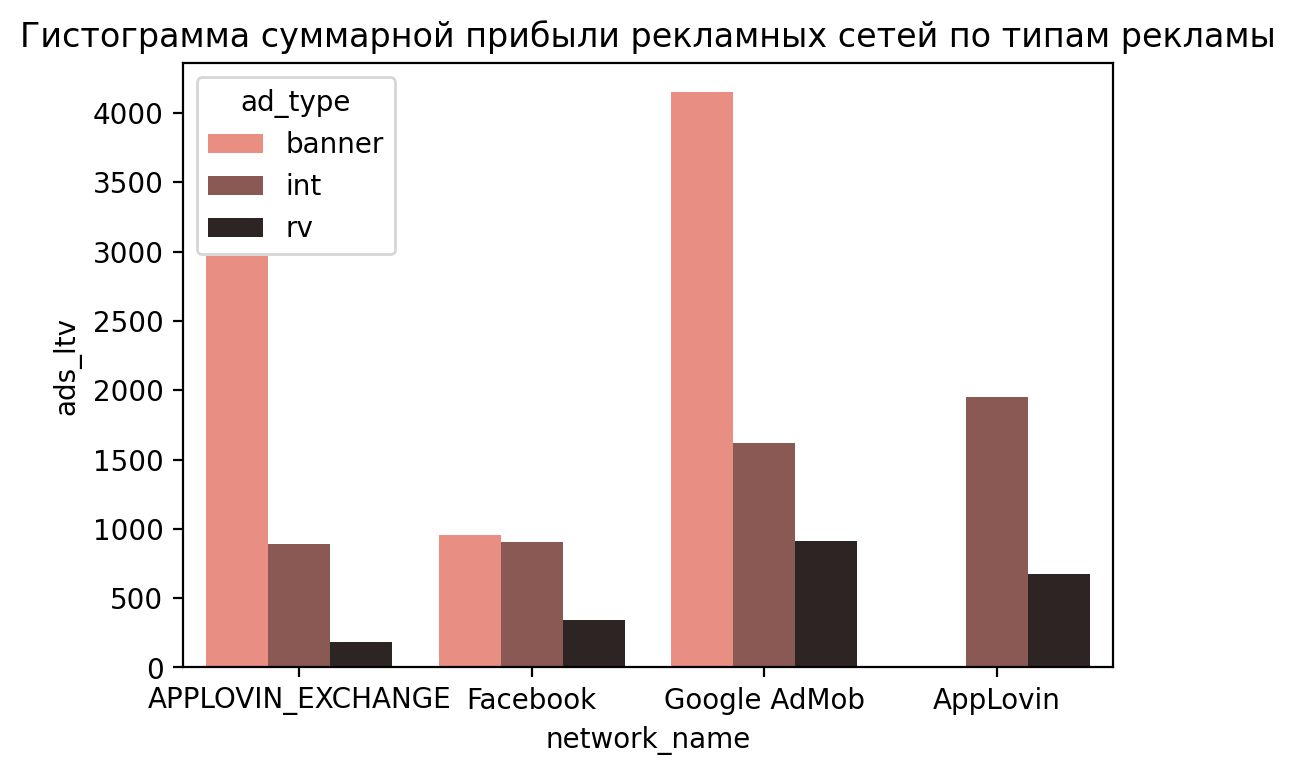

In [148]:
sns.barplot(data=sum_network_ltv, x='network_name', y='ads_ltv', hue='ad_type', palette='dark:salmon_r', ci=None).set(title='Гистограмма суммарной прибыли рекламных сетей по типам рекламы')

In [150]:
avg_network_ecpm = ecpm_df.groupby(['network_name', 'ad_type']).agg({'ecpm': 'mean'}).reset_index()

[Text(0.5, 1.0, 'Гистограмма суммарной прибыли рекламных сетей по типам рекламы')]

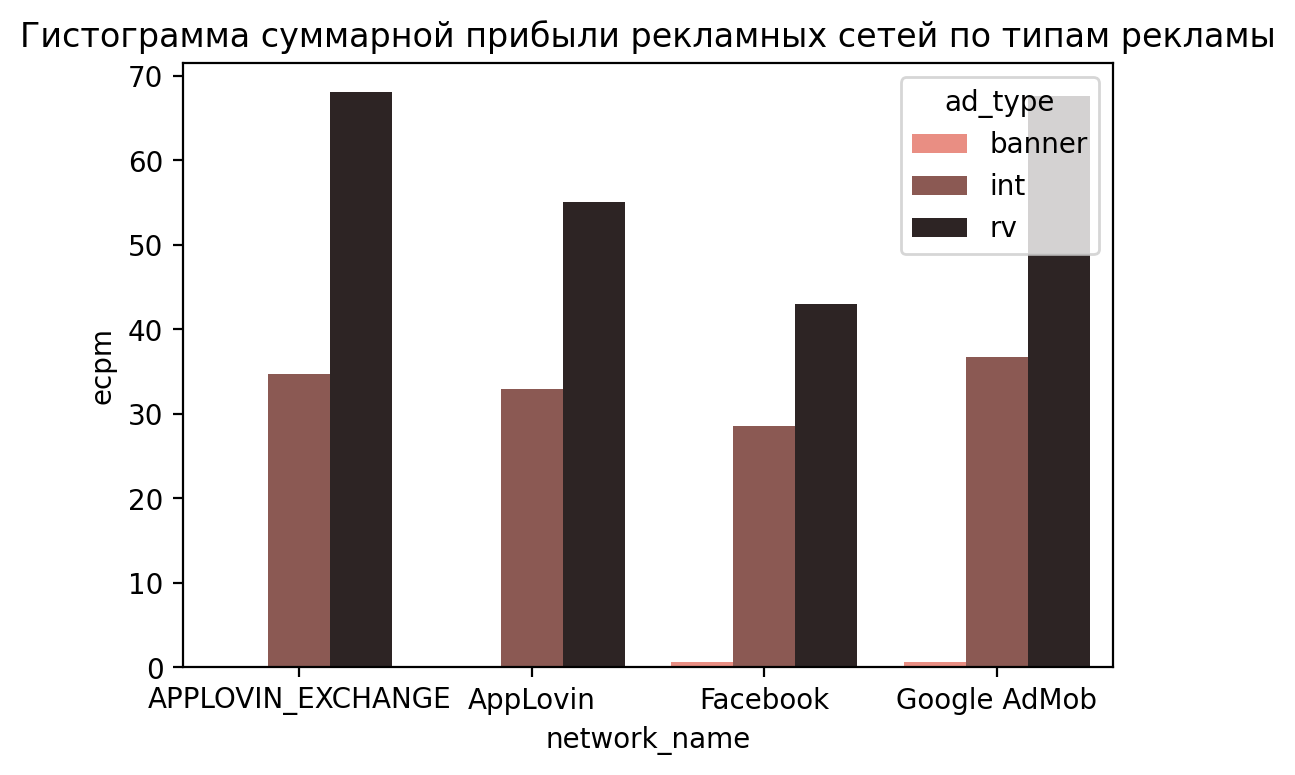

In [151]:
sns.barplot(data=avg_network_ecpm, x='network_name', y='ecpm', hue='ad_type', palette='dark:salmon_r', ci=None).set(title='Гистограмма средних ecpm рекламных сетей по типам рекламы')

In [152]:
avg_network_banner_ecpm = ecpm_df[ecpm_df.ad_type == 'banner'].groupby(['network_name']).agg({'ecpm': 'mean'}).reset_index()

[Text(0.5, 1.0, 'Гистограмма суммарной прибыли рекламных сетей по типам рекламы')]

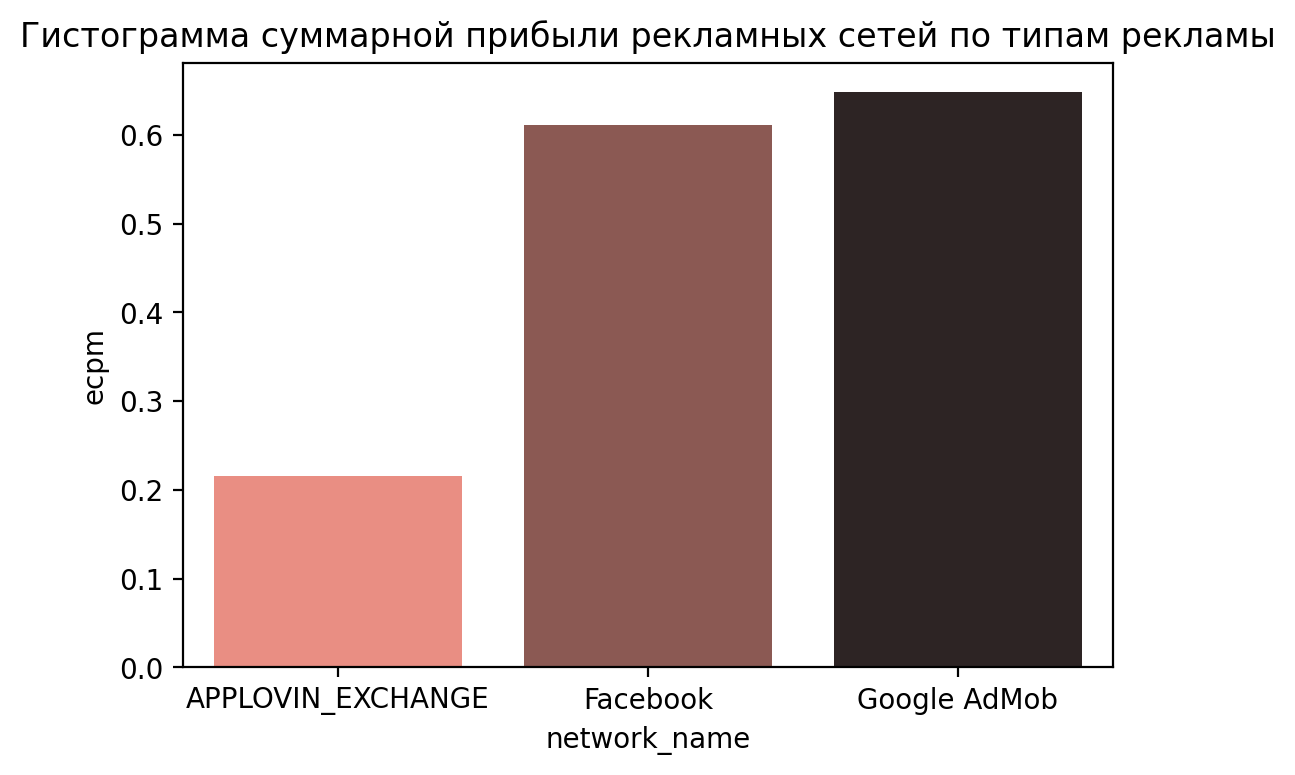

In [153]:
sns.barplot(data=avg_network_banner_ecpm, x='network_name', y='ecpm', palette='dark:salmon_r', ci=None).set(title='Гистограмма средних ecpm рекламных сетей с баннероной рекламой')

По итогу можно сделать следующие выводы

*   Баннерная реклама самая прибыльная
*   Распределение средних ecpm юзеров близко к логнормальному. Это может объясняться работой водопадной рекламной сети.
*   Из-за того, что средний ecpm сети facebook в более двух больше, чем у сети APPLOVIN, можно попробовать баннеры APPLOVIN заменить на facebook.



